In [44]:
import matplotlib.pyplot as plt
import pandas as pd
import sys
import seaborn as sns
import numpy as np
from scipy import ndimage


sys.path.append('../../shared')
from file_analyzer import FileAnalyzer


# Analyze your file
analyzer = FileAnalyzer('../../../data/MTA_Permanent_Art_Catalog__Beginning_1980_20250829.csv')
analyzer.print_summary()

# Get the DataFrame
df = analyzer.get_dataframe()


FILE ANALYSIS SUMMARY
📁 File: MTA_Permanent_Art_Catalog__Beginning_1980_20250829.csv
📊 Type: CSV
💾 Size: 523.4 KB
📈 Shape: (381, 9)
🔢 Columns: 9
📋 Rows: 381


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Agency           381 non-null    object
 1   Station Name     381 non-null    object
 2   Line             378 non-null    object
 3   Artist           381 non-null    object
 4   Art Title        381 non-null    object
 5   Art Date         381 non-null    int64 
 6   Art Material     381 non-null    object
 7   Art Description  378 non-null    object
 8   Art Image Link   376 non-null    object
dtypes: int64(1), object(8)
memory usage: 26.9+ KB


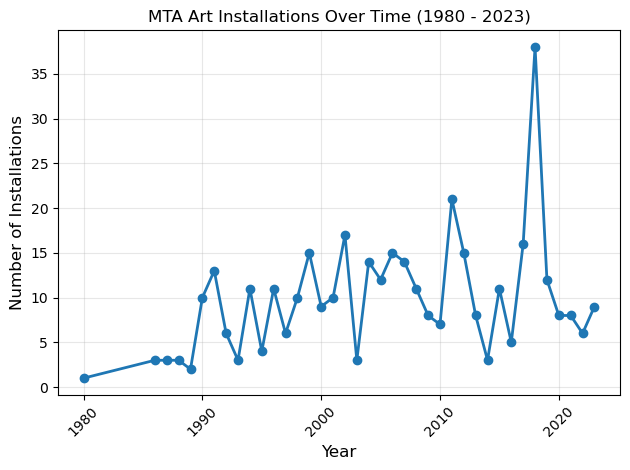

In [ ]:
installations_by_year = df['Art Date'].value_counts().sort_index()
plt.Figure(figsize=(12, 6))
plt.title('MTA Art Installations Over Time (1980 - 2023)')
plt.plot(installations_by_year.index, installations_by_year.values, marker='o', linewidth=2, markersize=6)
plt.xlabel
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Installations', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# Add some styling
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Installations by agency')

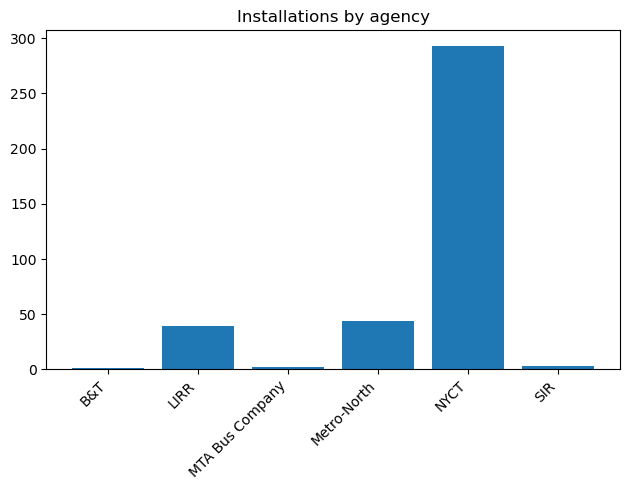

In [28]:
installations_by_agency = df['Agency'].value_counts().sort_index()
fig, ax = plt.subplots()

ax.bar(installations_by_agency.index, installations_by_agency.values)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
ax.set_title('Installations by agency')


Text(0.5, 1.0, 'Installations by agency')

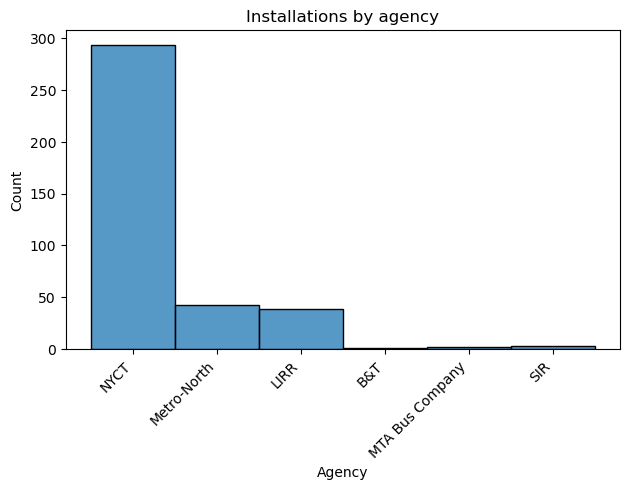

In [45]:
fig, ax = plt.subplots()
sns.histplot(data=df, x='Agency', ax=ax, discrete=True, stat='count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
ax.set_title('Installations by agency')

Text(0.5, 1.0, 'Smoothed Distribution of Installations by Agency')

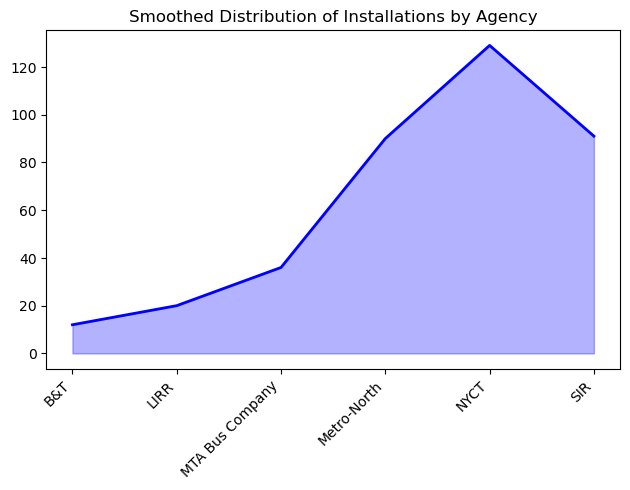

In [48]:
# Create smooth curve using gaussian filter
x = np.arange(len(installations_by_agency))
y_smooth = ndimage.gaussian_filter1d(installations_by_agency.values, sigma=1.0)

fig, ax = plt.subplots()
ax.plot(x, y_smooth, linewidth=2, color='blue')
ax.fill_between(x, y_smooth, alpha=0.3, color='blue')
ax.set_xticks(x)
ax.set_xticklabels(installations_by_agency.index, rotation=45, ha='right')
plt.tight_layout()
ax.set_title('Smoothed Distribution of Installations by Agency')